#### Another question of the Industrial Project 2 is, if other shapes than rectangulars can be detected in images

##### The opencv module offers a function called " hough circle" which is able to detect circles on blurred grayscale images
https://docs.opencv.org/3.4/d4/d70/tutorial_hough_circle.html
##### A limitation of this function is that it is only capable of detecting perfectly circular images.

In [1]:
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
from matplotlib import pyplot as plt

import numpy as np
import imutils
import cv2

src = cv2.imread("Images/Test_3.jpg")
    
    
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5) 
rows = gray.shape[0]
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=50, param2=80,
                            minRadius=1, maxRadius=100)
        
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(src, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(src, center, radius, (255, 0, 255), 3)
    
result = cv2.circle(src, center, radius, (255, 0, 255), 3)

    
cv2.imshow("detected circles", src)
cv2.waitKey(0)
cv2.destroyAllWindows()


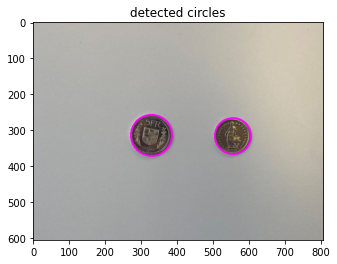

In [2]:
show_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
	
plt.imshow(show_result)
plt.title("detected circles")
plt.show()

##### With the following code example, it is possible to detect any polygonial shapes. It is possible to adjust the threshold of how many sides the polygon should have. 

In [3]:
# read the input image
img = cv2.imread('Images/polygons.png')

# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# apply thresholding to convert the grayscale image to a binary image
ret,thresh = cv2.threshold(gray,50,255,0)

# find the contours
contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print("Number of contours detected:",len(contours))
for cnt in contours:
   approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt, True), True)
   (x,y)=cnt[0,0]

   if len(approx) >= 10: #Threshold of how many sides the polygon should have 
      img = cv2.drawContours(img, [approx], -1, (0,255,0), 3)
      cv2.putText(img, 'Polygon', (x, y),
cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 0), 2)
cv2.imshow("Polygon", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of contours detected: 3


##### These two examples showed that it is possible to detect alternative shapes (circles, ellipses, polygons) with OpenCV
